# Teste de hipótese com uma amostra (Parte 2/3)

#### Na Parte 1 mostrou-se quais são as principais distribuições de densidade de probabilidade da Estatística. Agora veremos como implementar intervalos de confiança para testes z, t e qui-quadrado usando a biblioteca estatística Scipy.

#### A teoria por trás do funcionamento de um intervalo de confiança para um parâmetro populacional específico está muito bem explicada no link a seguir: https://pt.wikipedia.org/wiki/Intervalo_de_confian%C3%A7a

#### Obs: Para os três tipos de intervalos de confiança explanados aqui só é válido análise sobre amostras de populações normalmente distribuídas e/ou com tamanho de pelo menos 30 elementos (Teorema do Limite Central).

In [1]:
# Visualização.
import matplotlib.pyplot as plt 
import seaborn as sns

# Operações matemáticas.
import numpy as np

In [2]:
# Semente de reprodução.
np.random.seed(0)

# Estilização.
sns.set(color_codes=True)
sns.set(rc={'figure.figsize': (13,8)})
sns.set_style('whitegrid')

plt.rc('axes', titlesize=10)  # Título
plt.rc('axes', labelsize=18)  # Rótulos de x e y
plt.rc('xtick', labelsize=15) # Valores em x
plt.rc('ytick', labelsize=15) # Valores em y
plt.rc('legend', fontsize=20) # Legenda

### Distribuição Normal Padrão (z)

#### A Distribuição Normal Padrão é um caso especial de Distribuição Normal em que a média da distribuição é zero (μ = 0) e o desvio é 1 (σ = 1). Como já vimos, a definição matemática de uma Distribuição Normal é dada por:

$$ X \sim N(\mu, \sigma^2): f(x; \mu, \sigma) = \dfrac{1}{\sigma\sqrt{2\pi}} e^{-\dfrac{1}{2}\left(\dfrac{x-\mu}{\sigma}\right)^2} $$

#### Substituindo μ = 0 e σ = 1 temos:

$$ f(x; 0, 1) = \dfrac{1}{1\sqrt{2\pi}} e^{-\dfrac{1}{2}\left(\dfrac{x-0}{1}\right)^2} = \dfrac{1}{\sqrt{2\pi}} e^{-\dfrac{x^2}{2}} $$

#### Portanto:

$$ Z \sim N(0, 1): f(z) = \dfrac{1}{\sqrt{2\pi}} e^{-\dfrac{z^2}{2}} $$


#### O método Scipy de distribuições que retorna o valor f(z) é o pdf(z), vejamos:

In [3]:
from scipy.stats import norm

In [4]:
# Definindo uma distribuição normal com norm(). 
# No ponto igual a 1 o método pdf(1) deve retornar: f(1) = norm.pdf(1) = [e^-(1²/2)]/sqrt(2*pi) ~ 0.24197

norm.pdf(1)

0.24197072451914337

#### A integral da função f(x) é a função densidade acumulada da curva até o ponto x:

$$ \large FDA(x; \mu, \sigma) = \int_{-\infty}^{x} \dfrac{1}{\sigma\sqrt{2\pi}} e^{-\dfrac{1}{2}\left(\dfrac{x-\mu}{\sigma}\right)^{\huge 2}}dx = \dfrac{1}{2}\left(1 + \textrm{erf}\left(\dfrac{x - \mu}{\sigma \sqrt{2}}\right)\right) $$

#### A função *erf* é chamada de Error Function (Função Erro) e é uma função não-elementar, ou seja, ela não pode ser escrita em termos de funções matemáticas elementares como funções trigonométricas, logarítmicas, exponenciais e etc. Essa função é definida como:

$$ \large \textrm{erf}(x) = \dfrac{2}{\sqrt{\pi}} \int_{0}^{x} e^{-t^2}dt$$

#### Ela é diferenciável para todos os pontos x, logo podemos fazer uma aproximação usando a Série de Taylor:

$$ \large \textrm{erf}(x) \approx \dfrac{2}{\sqrt{\pi}} \sum_{n=0}^{\infty}\dfrac{x}{2n+1} \prod_{k=1}^n\dfrac{-x^2}{k}$$

#### Aplicando a Função Erro à curva Z:

$$ \large FDA(z) = \dfrac{1}{2}\left(1 + \textrm{erf}\dfrac{z}{\sqrt{2}}\right) $$

#### O método Scipy para a densidade acumulada até o ponto z é cdf(z).


In [5]:
# Da tabela z temos que FDA(-1.645) ~ 0.05

norm.cdf(-1.645)

0.049984905539121376

In [6]:
# Por simples complemento de área, a probabilidade acumulada à direita de z é 1 - norm.cdf(z), já que a área total é 1.
# A biblioteca Scipy também implementa um método para esse cálculo, sf(z).

# Tabela z: FDA(0.675) ~ 0.25

norm.sf(0.675), np.allclose(1 - norm.cdf(0.675), norm.sf(0.675))

(0.24983788247177702, True)

#### Se fizermos a inversa de FDA então teremos uma função que retorna o valor z para uma dada probabilidade acumulada. Essa função no entanto não pode ser expressa por funções elementares, logo seu cálculo é feito por métodos de aproximação numéricos. O método Scipy para essa função inversa é o ppf(q), sendo q a probabilidade acumulada à esquerda. O complemento também está disponível pelo método isf(q).

In [7]:
# Tabela z: inv(FDA(0.1)) ~ -1.28

norm.ppf(0.1)

-1.2815515655446004

In [8]:
# Tabela z: 1 - inv(FDA(0.2)) ~ 0.84

norm.isf(0.2)

0.8416212335729142

#### Os extremos do intervalo com nível de confiança α são calculados usando o método interval(α). Perceba que os extremos são, para um intervalo de teste bilateral, opostos um ao outro.

In [9]:
# Tabela z: c = 0.90 --> ~(-1.645, 1.645)

norm.interval(0.90)

(-1.6448536269514729, 1.6448536269514722)

#### Para calcular os escores-z de todos os valores de uma amostra usa-se a função zscore.

#### O escore-z representa quantos desvios padrão um valor específico se encontra distante da média:

$$ z = \dfrac{x - \mu}{\sigma}$$

In [10]:
from scipy.stats import zscore

In [11]:
amostra = np.arange(10)
amostra

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
zscore(amostra, ddof=1)

array([-1.48630108, -1.15601195, -0.82572282, -0.49543369, -0.16514456,
        0.16514456,  0.49543369,  0.82572282,  1.15601195,  1.48630108])

In [13]:
# Usando a definição.

(amostra - amostra.mean())/amostra.std(ddof=1)

array([-1.48630108, -1.15601195, -0.82572282, -0.49543369, -0.16514456,
        0.16514456,  0.49543369,  0.82572282,  1.15601195,  1.48630108])

#### O Erro Padrão Populacional de uma amostra de tamanho n é definido como o desvio amostral das médias amostrais, e é calculado quando se tem o valor do desvio populacional:

$$ \sigma_\bar{x} = \dfrac{\sigma}{\sqrt{n}} $$

#### O Erro Padrão Amostral por sua vez é calculado sobre o desvio amostral:

$$ \sigma_\bar{x} = \dfrac{s}{\sqrt{n}} $$

#### A função Scipy de Erro Padrão é a sem.

In [14]:
from scipy.stats import sem

In [15]:
# Erro Padrão de uma amostra. O Erro Padrão é o amostral por padrão (ddof=1).

sem(amostra)

0.9574271077563381

In [16]:
# Usando a definição.

np.std(amostra, ddof=1)/np.sqrt(len(amostra))

0.9574271077563381

#### Vamos agora implementar uma função que retorna as margens de erro para uma média populacional μ usando a média amostral x e o desvio padrão populacional σ, isto é, vamos usar o intervalo de confiança padrão z para criar um intervalo de confiança na grandeza da média populacional. Para isso vamos usar o simples conceito de que o erro nada mais é do que a quantidade de desvios que certo valor se encontra da média, que nesse caso é a própria média amostral. O erro E que deve ser adicionado e subtraído da média amostral para criar o intervalo é então: 

$$ E = z_c \dfrac{\sigma}{\sqrt{n}} $$

#### sendo z o valor crítico associado ao nível de confiança α do intervalo.

In [17]:
# Parâmetros:
# amostra: A estrutura de dados contendo os valores das amostras;
# desvio: O desvio padrão da população que foi retirada a amostra;
# alpha: Nível de confiança.

def intervalo_z(amostra, desvio, alpha):

    # O argumento loc centralizará o intervalo em torno do valor passado, e nesse caso queremos centralizar em torno da média amostral.
    # Por sua vez, o argumento scale recebe o valor do erro padrão populacional, que é o nosso desvio das médias amostrais.
    return norm.interval(alpha=alpha, loc=np.mean(amostra), scale=desvio/np.sqrt(len(amostra)))

In [18]:
amostra = np.array('30 26 33 26 26 33 31 31 21 37 27 20 34 35 30 24 38 34 39 31 22 30 23 23 31 44 31 33 33 26 27 28 25 35 23 32 29 31 25 27'.split(), dtype=int)
amostra

array([30, 26, 33, 26, 26, 33, 31, 31, 21, 37, 27, 20, 34, 35, 30, 24, 38,
       34, 39, 31, 22, 30, 23, 23, 31, 44, 31, 33, 33, 26, 27, 28, 25, 35,
       23, 32, 29, 31, 25, 27])

In [19]:
intervalo_z(amostra, 7.9, 0.95)

(27.151809622396982, 32.04819037760302)

In [20]:
# Prova real usando a definição:
# (limite inferior, limite superior) = (x - E, x + E), sendo E = z * σ/sqrt(n)


alpha, n, desvio = 0.95, len(amostra), 7.9

z = abs(norm.ppf((1 - alpha)/2)) # Lembrando, o teste é bilateral.
erro_padrao = desvio/np.sqrt(n)
E, media_amostral = z * erro_padrao, np.mean(amostra)
lim_inf, lim_sup= media_amostral - E, media_amostral + E

(lim_inf, lim_sup)

(27.151809622396982, 32.04819037760302)

#### O intervalo de confiança para uma proporcão populacional também usa a Distribuição Normal Padrão como base, a unica diferença entre esse intervalo e o da média populacional é o erro padrão que usa o desvio dado por:

$$ \sigma_\hat{p} = \dfrac{\sigma}{n} = \dfrac{\sqrt{npq}}{n} = \sqrt{\dfrac{npq}{n^2}} = \sqrt{\dfrac{pq}{n}} $$

#### A igualdade σ² = npq vem da Distribuição Binomial, já apresentada na Parte 1. Com esse desvio padrão em mãos podemos calcular o erro E:

$$ E = z_c \sqrt{\dfrac{pq}{n}} $$

#### Novamente definiremos uma função.

In [21]:
def intervalo_z_prop(p, n, alpha):

    return norm.interval(alpha=alpha,             # Confiança
                         loc=p,                   # Centralização
                         scale=np.sqrt(p*(1-p)/n) # Erro padrão
                         )

In [22]:
intervalo_z_prop(0.372, 1000, 0.90)

(0.3468592315238385, 0.3971407684761615)

In [23]:
# Prova real usando a definição:

p, q, n, alpha = 0.372, 1-0.372, 1000, 0.9
z = abs(norm.ppf((1-alpha)/2))
erro_padrao = np.sqrt(p*q/n)
E = z * erro_padrao
lim_inf, lim_sup = p - E, p + E

lim_inf, lim_sup

(0.3468592315238385, 0.3971407684761615)

### Distribuição t de Student

#### A Distribuição t de Student, ou simplesmente Distribuição t, é uma família de curvas parametrizadas por graus de liberdade de forma que quanto maior for esse parâmetro (v) mais a Distribuição t se aproxima de uma Distribuição Normal. Portanto, já podemos afirmar que a média μ é zero. A variância (e o desvio consequentemente) no entanto depende do grau v de liberdade. O grau de liberdade é definido como sendo o tamanho da amostra menos um (v = n-1). A função densidade de probabilidade de uma Distribuição t é dada por:

$$f(t)=\dfrac{\Gamma(\frac{v+1}{2})}{\Gamma(\frac{v}{2})\sqrt{v\pi}}\left(1+\dfrac{t^2}{v}\right)^{-(\frac{v+1}{2})}$$

#### A Distribuição t é usada no âmbito dos intervalos de confiança para criar intervalos para médias populacionais quando não se sabe o valor do desvio padrão populacional.

#### Todos os métodos Scipy usados na classe norm() também são aplicáveis à classe que implementa a Distribuição t, t(), exceto que agora devemos passar também o grau de liberdade da distribuição para o argumento df (degrees of freedom).

In [24]:
from scipy.stats import t

#### Vamos visualizar algumas distribuições t, cada uma com um grau de liberdade diferente.

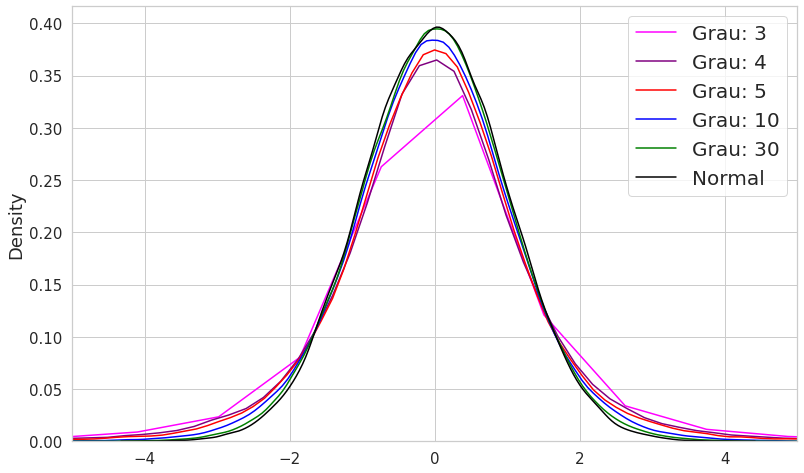

In [25]:
# Grid 1x1.
fig, ax = plt.subplots(1, 1)

# 5 distribuições t com graus 2, 5, 10, 30 e 50, e cores magenta, roxa, vermelha, azul e verde respectivamente.
for grau, cor in zip((3, 4, 5, 10, 30), ('magenta', 'purple', 'red', 'blue', 'green')):
    
    # O método rvs (random value sampling) faz uma amostragem de valores na distribuição t com grau df. 
    # Nesse caso estamos fazendo uma amostragem de 100000 elementos.
    data_t = t.rvs(df=grau, size=100000)

    # Kernel da Estimativa de Densidade das 5 curvas.
    sns.kdeplot(data_t, ax=ax, color=cor, label=f'Grau: {grau}')

# Vamos plotar a Distribuição Normal Padrão na cor preta para efeitos de comparação.
sns.kdeplot(norm.rvs(size=100000), ax=ax, color='black', label='Normal')
plt.xlim([-5, 5]) # Limites do eixo x.
plt.legend()
plt.show()

#### Nas extremidades das curvas t a densidade é maior e na parte central ela é menor, isso ocorre de forma a compensar a falta de informação de um desvio padrão populacional preciso. Quando aumentamos o tamanho da amostra aumentamos também o grau de liberdade (v = n-1) e isso aproxima a curva t da curva z, já que agora temos mais informações que nos levam a um desvio padrão populacional mais condizente com o real.

#### O erro E segue a mesma lógica para uma distribuição t, só que agora em vez de usarmos o valor crítico z usamos o valor crítico t. O desvio padrão populacional também é substituído (já que não o sabemos) pelo desvio amostral:


$$E=t_c\dfrac{s}{\sqrt{n}}$$

#### Novamente construiremos uma função de intervalos, a testaremos e faremos a prova real usando a definição de intervalos.

In [26]:
# Parâmetros:
# amostra: A estrutura de dados contendo os valores das amostras;
# alpha: Nível de confiança;

def intervalo_t(amostra, alpha):

    # Cálculo do erro padrão.
    # Por default o método sem() (standard error of the mean) calcula o erro padrão amostral.
    s = sem(amostra)

    return t.interval(alpha=alpha,          # Confiança
                      df=len(amostra) - 1,  # Graus de liberdade
                      loc=np.mean(amostra), # Centralização
                      scale=s)              # Erro Padrão

In [27]:
amostra = np.array('30 26 33 26 26 33 31 31 21 37 27 20 34 35 30 24 38 34 39 31 22 30 23 23 31 44 31 33 33 26 27 28 25 35 23 32 29 31 25 27'.split(), dtype=int)
amostra

array([30, 26, 33, 26, 26, 33, 31, 31, 21, 37, 27, 20, 34, 35, 30, 24, 38,
       34, 39, 31, 22, 30, 23, 23, 31, 44, 31, 33, 33, 26, 27, 28, 25, 35,
       23, 32, 29, 31, 25, 27])

In [28]:
intervalo_t(amostra, 0.8)

(28.51249859853268, 30.687501401467323)

In [29]:
# Prova real usando a definição:

alpha, n, df = 0.8, len(amostra), n-1
media_amostral, erro_padrao = np.mean(amostra), sem(amostra)
t_c = abs(t.ppf((1 - alpha)/2, df=df))
E = t_c * erro_padrao
lim_inf, lim_sup = media_amostral - E, media_amostral + E

(lim_inf, lim_sup)

(28.530216286450205, 30.669783713549798)

### Distribuição Qui-quadrado

#### A Distribuição Qui-quadrado é um caso especial da Distribuição Gama, e assim como a Distribuição t ela também representa uma família de infinitas curvas parametrizadas por graus de liberdade, sendo o grau de liberdade igual ao tamanho da amostra menos um (v = n - 1). A função densidade de probabilidade de uma função qui-quadrado é dada por:

$$ f(x; v) = \dfrac{1}{2^{v/2}\Gamma(v/2)}x^{v/2-1}e^{-x/2} $$

#### A função Γ (Gama) já foi abordada na Parte 1. 
#### Sendo essencialmente uma Distribuição Gama, a Distribuição Qui-quadrado é assimétrica à direita, de forma a não podermos aproveitar as propriedades reflexivas das distribuições normais em torno da média como fizemos com a distribuição z e t. Os intervalos de confiança gerados por uma Distribuição Qui-quadrado precisam necessariamente ser para parâmetros que apresentam comportamento quadrático, isto é, podemos usá-la para a variância populacional, e consequentemente para o desvio padrão populacional. A classe que implementa essa distribuição é a chi2().

In [30]:
from scipy.stats import chi2

#### Vejamos o comportamento da Distribuição Qui-quadrado conforme o grau de liberdade aumenta.

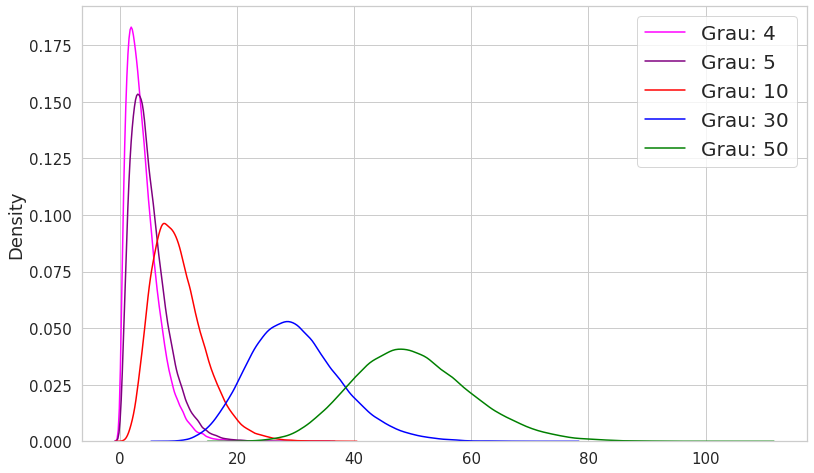

In [31]:
fig, ax = plt.subplots(1, 1)

for grau, cor in zip((4, 5, 10, 30, 50), ('magenta', 'purple', 'red', 'blue', 'green')):

    data_chi = chi2.rvs(df=grau, size=100000)
    sns.kdeplot(data_chi, ax=ax, color=cor, label=f'Grau: {grau}')

plt.legend()
plt.show()

#### Percebe-se que quanto maior o grau de liberdade mais a distribuição perde o caráter assimétrico, isto é, mais ela se aproxima de uma distribuição normal. A assimetria à direita também pode ser facilmente identificada nas plotagens.
#### Diferentemente das outras duas distribuições que tinham um erro E com comportamento linear e podíamos encontrar facilmente os limites dos intervalos, agora teremos que adaptar esse método para contemplar o comportamento quadrático da distribuição de forma que os novos limites sejam iguais a:

$$ l_{inf} = \dfrac{(n-1)s^2}{X_r^2},  l_{sup}=\dfrac{(n-1)s^2}{X_l^2}$$

#### sendo os denominadores Xr² e Xl² os valores críticos à direita e à esquerda da distribuição para um dado nível de confiança respectivamente. Os valores s² e n são a variância e o tamanho da amostra. Como fizemos com as outras duas distribuições vamos implementar uma função e validá-la.

In [32]:
# Parâmetros:
# amostra: A estrutura de dados contendo os valores das amostras;
# alpha: Nível de confiança;

def intervalo_chi(amostra, alpha):

    s= np.std(amostra, ddof=1) # Desvio amostral
    df = len(amostra) - 1      # Graus de liberdade

    # Calculando os valores críticos.
    xl, xr = chi2.interval(alpha=alpha, # Nível de confiança
                           df=df        # Graus de liberdade
                           )

    # Retorno com os valores extremos do intervalo de confiança para a variância populacional.
    return (df*s**2/xr, df*s**2/xl)

In [33]:
intervalo_chi(amostra, 0.99)

(16.580229618776773, 54.291216904851204)

In [34]:
np.sqrt(intervalo_chi(amostra, 0.99)) # Intervalo de confiança para o desvio padrão populacional.

array([4.07188281, 7.36825739])